<a href="https://colab.research.google.com/github/skandanyal/Deep_Learning/blob/main/Workflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Exploring an end-to-end workflow.

In [ ]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together (training pipeline)",
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together (training pipeline)'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.8.0+cu126


## Data (preparing and loading)

**Data can be almost anything**

* Excel spreadsheets
* Images of any kind
* Videos
* Audio
* DNA
* Text       

**Machine learning is a game of two parts:**
1.    Get data into numerical representation.
2.    Build a model to learn patterns in that numerical representation.

**Building a linear regression model for demonstration:**    
Use a linear regression formula to make a straight line with known **parameters.**

In [ ]:
# Create *knwon* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Looking at a few numbers
print(X[:10])
print( y[:10])
print(len(X), len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


**Splitting data into training and test datasets**

In [ ]:
# Create train-test-split

train_split = int(0.75 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Training data: {len(X_train)} samples")
print(f"Test data: {len(X_test)} samples")

Training data: 37 samples
Test data: 13 samples


**How can we better visualize our data:**

Visualize! Visualize! Visualize!

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        # we shall compare predictions against y_test
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # legend
    plt.legend(prop={"size": 14})

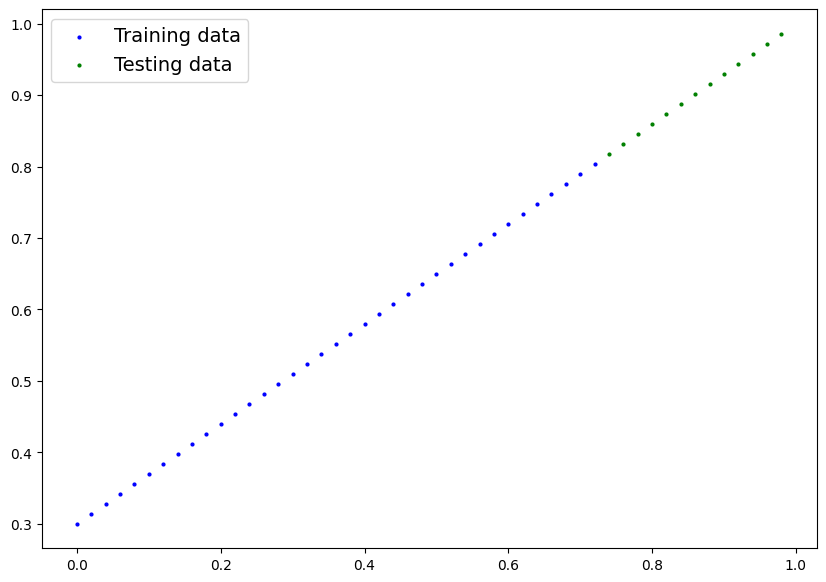

In [ ]:
plot_predictions()

## Build model

**What our model does:**
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

**How does it do so?**
1.    Gradient descent
2.    Backpropagation

In [ ]:
# Create a linear regression python class

import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # initialize model
        self.weights = nn.Parameter(torch.randn(1,  # start with a random number and work through it
                                                requires_grad=True,
                                                dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,     # start with a random number and work through it
                                             requires_grad=True,
                                             dtype=torch.float))

    # forward() method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials

* `torch.nn` - contains all the blocks for NNs (computational graphs).
* `torch.nn.Parameter` - what params should out model try and learn from torch.nn,
* `torch.nn.Module` - base class for all nn modules. If you subclass it, you should override `forward()`.
* `torch.optim` - here is where the optimizers in pyTorch live, will help us with gradient descent.
* def `forward()` - all nn.Module() subclasses require you to overwrite forward()

### Checking the contents of our PyTorch model:

We can checking the model params using `.parameters()`.

In [ ]:
torch.manual_seed(5)                                            # create a random seed

model_0 = LinearRegressionModel()                               # creating an instance of our model
print(list(model_0.parameters()))                               # checking the parameters
print(list(model_0.state_dict()))                               # list all named params

[Parameter containing:
tensor([-0.4868], requires_grad=True), Parameter containing:
tensor([-0.6038], requires_grad=True)]
['weights', 'bias']


### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let us see how well it predicts `y_test` based upon `x_test`.

When we pass the data through our model, it's going to run it through the `forward()`method.

In [ ]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)

tensor([[-0.9640],
        [-0.9738],
        [-0.9835],
        [-0.9932],
        [-1.0030],
        [-1.0127],
        [-1.0225],
        [-1.0322],
        [-1.0419],
        [-1.0517],
        [-1.0614],
        [-1.0711],
        [-1.0809]])


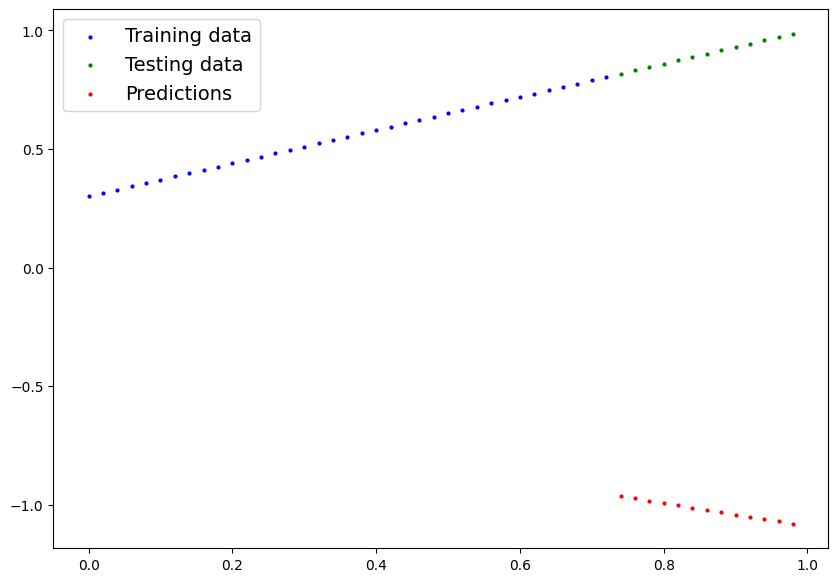

In [ ]:
plot_predictions(predictions=y_preds)                                   # damn.....

`torch.inference_mode()` and `torch.no_grad()` do a few things pretty similarly, and disctinctively. To know more, visit - https://x.com/PyTorch/status/1437838231505096708?lang=en

### Training a model

Taking the model from having a poor representation of data to a better representation of data.    

One way to know how poor a model is performing, is by analyzing its loss function (also called as cost function or criterion.)     

**Things we need to train a model:**
1.    **Loss function:** A function which basically says how wrong the model is.
2.    **Optimizer():** Takes into account the loss of a model and adjusts the model's parameters (weights and biases).    

Specifically for PyTorch, we need:
*    Training loop
*    Testing loop